# Задание 3B.3.1 Отбор признаков
## ШАГ 1

Выберите пять признаков, у которых наибольшая взаимосвязь с целевой переменной (с помощью корреляции). Отметьте отобранные признаки:

In [5]:
import pandas as pd

data = pd.read_csv('data/train_mobile.csv', sep = ';')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: >

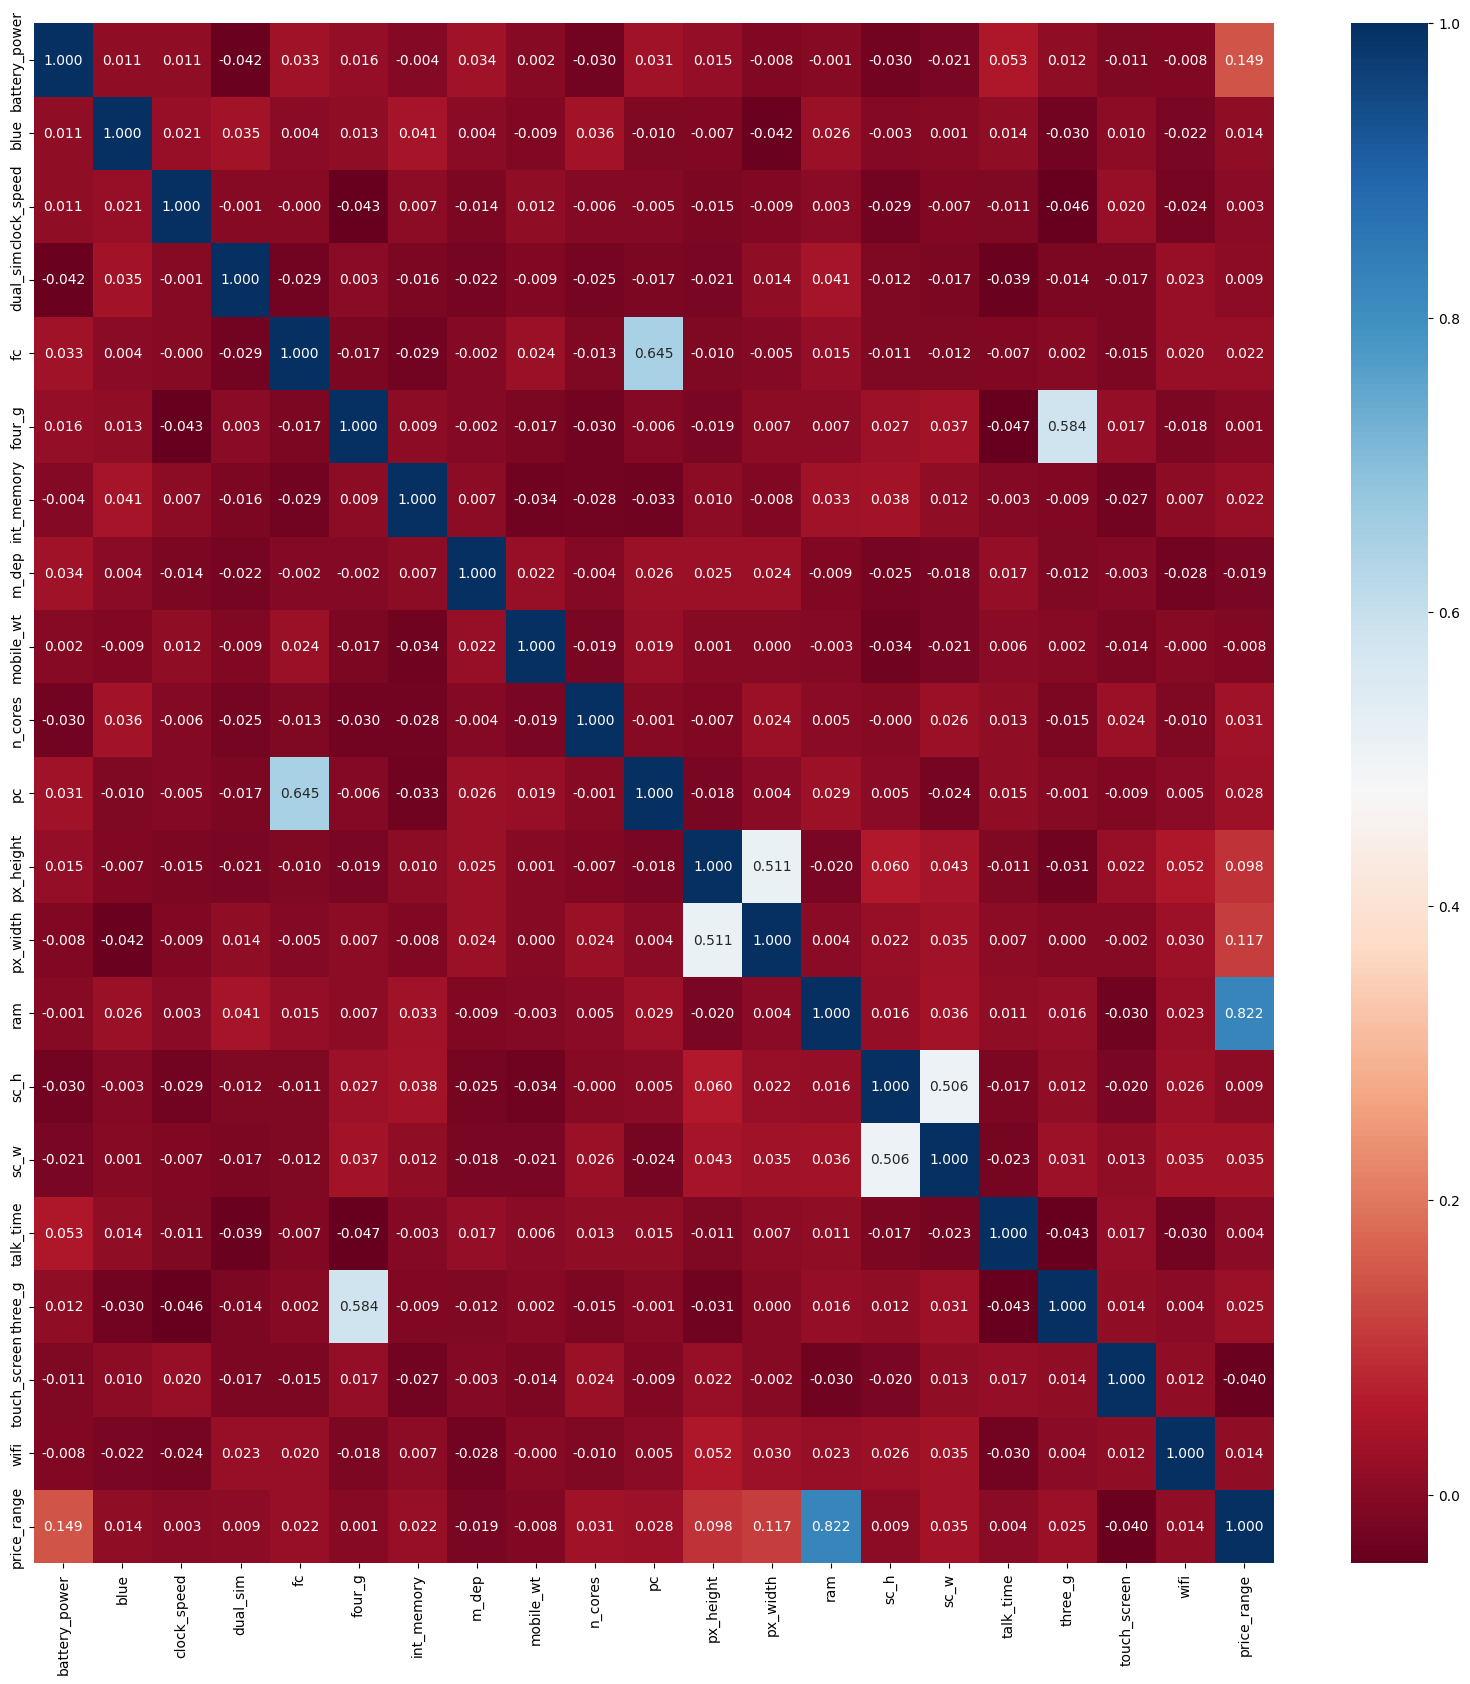

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap='RdBu')

In [23]:
print('battery_power', 'px_height', 'px_width', 'ram', 'touch_screen')

battery_power px_height px_width ram touch_screen


## Шаг 2
Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x = data[['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']]

y = data['price_range'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))


0.9875
0.9859154929577465
0.9905660377358491
0.9882352941176472


Введите полученное значение, округлите до четырех знаков после запятой. Целую и десятичную часть разделите точкой. Пример ввода: 5.5555.

In [49]:
print(precision_score(y_test,y_pred))

0.9859154929577465
